In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/napari/__init__.py:44: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.7. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


In [2]:
adata = sq.datasets.visium_hne_adata()

In [3]:
# adata_resnet.obs["resnet_embedding_cluster"].to_csv("/storage/groups/ml01/code/giovanni.palla/squidpy_reproducibility/notebooks/supp_figures/resnet_embedding.csv.gz")
obs_resnet = pd.read_csv("./resnet_embedding.csv.gz", index_col=0)

In [4]:
adata.obs["resnet_embedding"] = obs_resnet["resnet_embedding_cluster"].astype("category").values

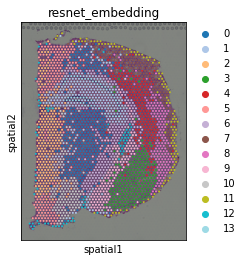

In [5]:
sc.pl.spatial(adata, color="resnet_embedding", palette="tab20")

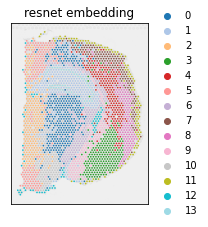

In [9]:
# plot resnet clusters
fig, ax = plt.subplots(figsize=(3, 5))
sc.pl.spatial(
    adata,
    color='resnet_embedding',
    img_key='hires',
    ax=ax,
    alpha_img=0.2,
    bw=True,
    title='resnet embedding',
    #legend_loc=False,
    show=False,
    palette='tab20'
)
#ax.set_facecolor((0.75,0.75,0.75))
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

# save figure
plt.tight_layout()
plt.savefig('figures/hne_resnet_embedding.png', dpi=300, bbox_inches='tight')

<ipython-input-8-984c5f5e1ade>:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


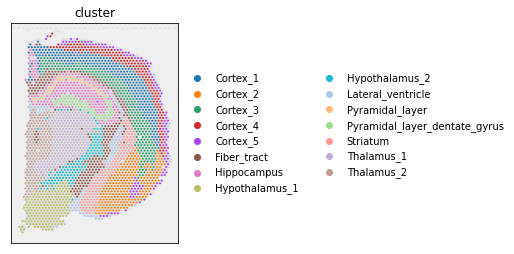

In [8]:
# plot resnet clusters
fig, ax = plt.subplots(figsize=(3, 5))
sc.pl.spatial(
    adata,
    color='cluster',
    img_key='hires',
    ax=ax,
    alpha_img=0.2,
    bw=True,
    title='cluster',
    #legend_loc=False,
    show=False,
)
#ax.set_facecolor((0.75,0.75,0.75))
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

# save figure
plt.tight_layout()
plt.savefig('figures/hne_gene_cluster.png', dpi=300, bbox_inches='tight')

In [13]:
def freq_cluster(adata, clust):
    
    df = adata.obs.copy()
    dic = {}
    for c in df[clust[0]].unique():
        tot_values = df[df[clust[0]] == c].shape[0]
        prop = (
            df[df[clust[0]] == c]
            [clust[1]].value_counts()
            .apply(lambda x: x / tot_values)
        )
        dic[c] = prop
    df_final = pd.DataFrame(dic).round(2).replace(np.nan, 0)
    col_cluster = adata.uns["cluster_colors"]
    col_resnet = adata.uns["resnet_embedding_colors"]
#     colors_basel = supclass_df[f"{phenotype_class}_colour"].unique()
    #     df_clust = df_clust[supclass_df[phenotype_class]]

    ax = sns.clustermap(
        df_final,
        annot=True,
        cmap="inferno",
        row_cluster=True,
        method="centroid",
        dendrogram_ratio=(.05, .05),
        figsize=(8, 10),
        col_colors=col_cluster,
        row_colors=col_resnet,
        #     row_colors=adata.uns["leiden_colors"],
    )
    sns.set(font_scale=1.2)
    ax.ax_cbar.set_position((1., .1, .03, .2))
    ax.ax_heatmap.set_xlabel(f"{clust[0]} original")
    ax.ax_heatmap.set_ylabel(f"{clust[1]} clusters")

    return

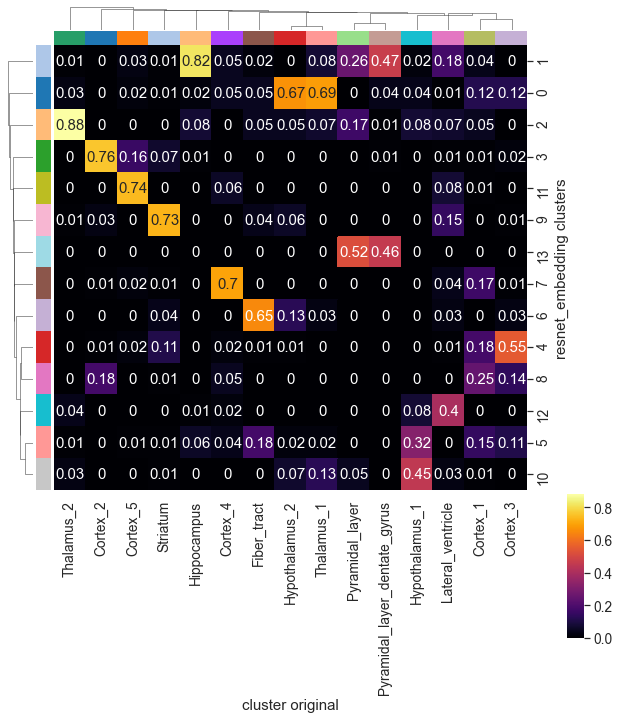

In [14]:
freq_cluster(adata, ["cluster","resnet_embedding"])